In [2]:
# needed this info to install some packages in the shell.
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [337]:
import numpy as np
import pandas as pd
import os
import json
import csv
import nltk
import wordcloud
import collections
from collections import Counter
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
#import scattertext
import time
#import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import string
import math
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
#from sklearn.grid_search import GridSearchCV
%matplotlib inline

---
## Loading the dataset and some quick graphs on star ratings. 

In [290]:
# to ignore some of the warnings that pop up later in the notebook
import warnings
warnings.filterwarnings('ignore')

In [15]:
# finding my directory containing the files
os.chdir('C:\\Users\\mohse\\Documents\\Capstone Project')
cwd = os.getcwd()
print(cwd)

C:\Users\mohse\Documents\Capstone Project


In [16]:
# loading my main file - the merged dataset including both Business + Reviews data from Yelp
mergedDF = pd.read_csv("MergedDF.csv")

In [3]:
#reviewDF = pd.read_csv("reviewDF.csv")

<AxesSubplot:xlabel='reviews_stars', ylabel='Density'>

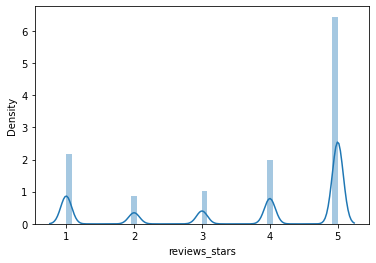

In [435]:
# taking a look at the density of star ratings in the reviews dataset - clearly 5 stars are the highest
sns.distplot(mergedDF["reviews_stars"])

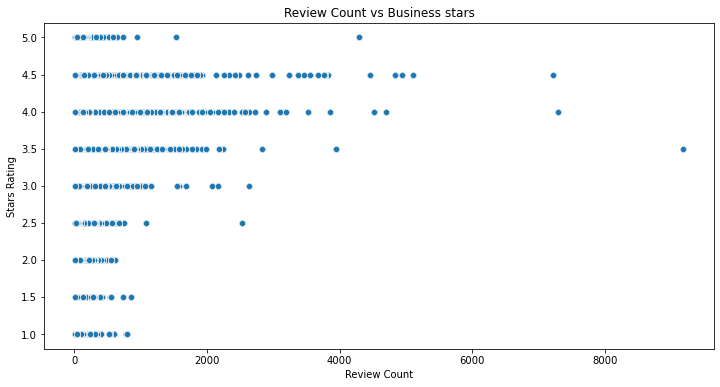

In [436]:
# continuing to look at the star ratings breakdown. This graph gives us a more in depth look at number of reviews.
# the highest number of reviews are for 4.5 and 4.0 ratings. 
# that gives us an idea of how most people write reviews when they have good things to say. 

plt.figure(figsize=(12,6))

sns.scatterplot(mergedDF['review_count'],mergedDF['business_stars'])
plt.title('Review Count vs Business stars')
plt.xlabel('Review Count')
plt.ylabel('Stars Rating')
plt.show()

---
## Now I'll manipulate the dataframe a little, and look at specific segments of the dataset. 

In [ ]:
# I am adding a column that shows whether the ratings are "low", "avg", or "high". 

mergedDF['rating'] = mergedDF['reviews_stars'].replace(
               {1:'Low Rating', 2:'Low Rating', 3:'Avg Rating',
                4:'High Rating', 5:'High Rating'})

In [57]:
# Since the overall merged dataset is a huge file, and takes a long time to process every time, 
# I will break it down into a smaller chunk, for quicker processing right now. 
# I will look at only "indian" resturants category businesses right now, just to start off with a small subset. 

indresto = mergedDF[mergedDF['categories'].str.contains('Indian', na=False)]

In [260]:
# this just shows how large the dataset is now. It's much smaller than before at 35k. 
indresto.count()

business_id       35354
name              35354
city              35354
state             35354
business_stars    35354
review_count      35354
attributes        35310
categories        35354
reviews_stars     35354
useful            35354
text              35354
rating            35354
length            35354
dtype: int64

In [59]:
indresto.head()

,business_id,name,city,state,business_stars,review_count,attributes,categories,reviews_stars,useful,text,rating
1174,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,Surrey,BC,4.0,9,"{'BusinessParking': ""{'garage': False, 'street...","Indian, Restaurants",2.0,0,They need alot of work to be in the lead. Mayb...,Low Rating
1175,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,Surrey,BC,4.0,9,"{'BusinessParking': ""{'garage': False, 'street...","Indian, Restaurants",3.0,0,"Good food, a treat for your taste buds. Delici...",Avg Rating
1176,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,Surrey,BC,4.0,9,"{'BusinessParking': ""{'garage': False, 'street...","Indian, Restaurants",5.0,0,New South Indian restaurant and only the secon...,High Rating
1177,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,Surrey,BC,4.0,9,"{'BusinessParking': ""{'garage': False, 'street...","Indian, Restaurants",5.0,0,We really liked this place. We tried the fish ...,High Rating
1178,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,Surrey,BC,4.0,9,"{'BusinessParking': ""{'garage': False, 'street...","Indian, Restaurants",1.0,1,Being a keralite I was expecting a lot from h...,Low Rating


In [70]:
# removing some columns that I don't neeed. 

indresto2 = indresto.drop(columns=["attributes", "categories", "city", "state", "review_count", "rating"])

indresto2.head()

,business_id,name,business_stars,reviews_stars,useful,text
1174,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,2.0,0,They need alot of work to be in the lead. Mayb...
1175,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,3.0,0,"Good food, a treat for your taste buds. Delici..."
1176,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,5.0,0,New South Indian restaurant and only the secon...
1177,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,5.0,0,We really liked this place. We tried the fish ...
1178,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,1.0,1,Being a keralite I was expecting a lot from h...


In [71]:
# saving the indian restaurants dataset into a csv. 

indresto2.to_csv("IndRest.csv", index=False)

In [72]:
indresto2.dtypes

business_id        object
name               object
business_stars    float64
reviews_stars     float64
useful              int64
text               object
dtype: object

In [112]:
indresto2["text"]

1174       They need alot of work to be in the lead. Mayb...
1175       Good food, a treat for your taste buds. Delici...
1176       New South Indian restaurant and only the secon...
1177       We really liked this place. We tried the fish ...
1178       Being a keralite I  was expecting a lot from h...
                                 ...                        
2613392    For a city with so many good restaurants but s...
2613393    Best place in Boston for Indian food take out....
2613394    I don't know what it was but the butter chicke...
2613395    I LOVE this restaurant - you can't go wrong or...
2613396    Favorite Indian place. Samosas never fail to d...
Name: text, Length: 35354, dtype: object

In [261]:
# creating a new column that shows the length of each review on each row.
# this just gives an idea of how long the text reviews are. 

indresto2['length'] = indresto['text'].apply(len)
indresto2.head()

,business_id,name,business_stars,reviews_stars,useful,text,length
1174,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,2.0,0,They need alot of work to be in the lead. Mayb...,345
1175,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,3.0,0,"Good food, a treat for your taste buds. Delici...",226
1176,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,5.0,0,New South Indian restaurant and only the secon...,614
1177,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,5.0,0,We really liked this place. We tried the fish ...,147
1178,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,1.0,1,Being a keralite I was expecting a lot from h...,756


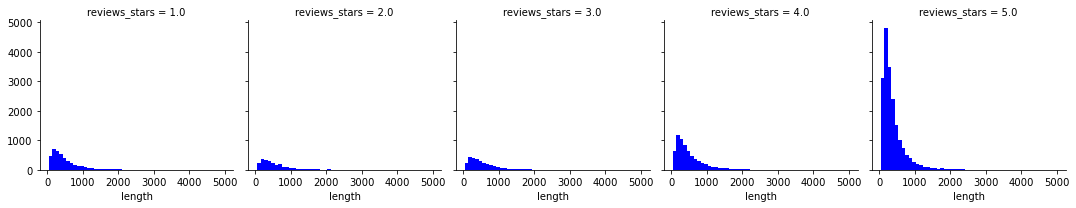

In [262]:
# here I look at comparisons of how long (in text length) reviews are per star rating
# this shows how much people write compared to the star ratings. 
# from these graphs, we can see that 4 and 5 star rated reviews are the longest written reviews usually.
# and we see that most 1 and 2 star reviews are quite short and don't have too much written.

graph = sns.FacetGrid(data = indresto2, col='reviews_stars')
graph.map(plt.hist,'length',bins=50,color='blue')

In [437]:
# finding mean values per star rating for the useful and length columns
# this just shows us that most "useful" rated reviews by users were 4 star reviews
# we can see that it has a mean value of 1.03. 

irval = indresto2.groupby('reviews_stars').mean()
irval

,business_stars,useful,length
reviews_stars,,,
1.0,3.712633,0.743491,523.975651
2.0,3.807237,0.763436,580.050783
4.0,3.993901,1.039006,527.784187
5.0,4.118096,0.688798,390.891040


---
## Creating wordclouds to show most common words in reviews

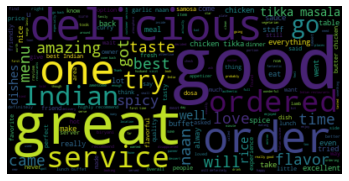

In [439]:
# Here I am creating a general wordcloud from ALL reviews. 


# Creating a stopwords list:
stopwords = set(STOPWORDS)

# I want to exlude some very commonly used words such as below. 
stopwords.update(["food", "restaurant", "place"])
textt = " ".join(review for review in indresto2.text)
wordcloud = WordCloud(stopwords = stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()


# You'll see that the most common words are great, service, good, order, delicious.

In [441]:
# now I am creating a new column that assigns reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3

indresto2 = indresto2[indresto2['reviews_stars'] != 3.0]
indresto2['sentiment'] = indresto2['reviews_stars'].apply(lambda rating : +1 if rating > 3.0 else -1)
indresto2.head()

,business_id,name,business_stars,reviews_stars,useful,text,length,sentiment
1174,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,2.0,0,They need alot of work to be in the lead Maybe...,345,-1
1176,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,5.0,0,New South Indian restaurant and only the secon...,614,1
1177,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,5.0,0,We really liked this place We tried the fish f...,147,1
1178,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,1.0,1,Being a keralite I was expecting a lot from h...,756,-1
1179,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,4.0,5.0,0,KERALA KITCHEN (45/5)\n\nFirst let me give you...,3310,1


In [280]:
# now I'll split the dataset into 2 types - positive and negative sentiment:
# so reviews are either positive or negative reviews based on star rating. 

possenti = indresto2[indresto2['sentiment'] == 1]
negsenti = indresto2[indresto2['sentiment'] == -1]

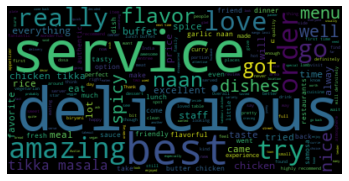

In [447]:
# here is the POSITIVE wordcloud - made from text from positive reviews only. 

stopwords = set(STOPWORDS)

## good and great removed because they were included in negative sentiment
stopwords.update(["food", "restaurant", "place", "good", "great", "Indian", "ordered", "one"]) 

pos = " ".join(review for review in possenti.text)

wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# You'll see the most common words used are service, delicious, ordered, love, amazing.

In [471]:
# here I am just simply calculating the top 50 most frequent words occurring in the POSITIVE reviews. 

post = Counter("".join(pos).split()).most_common(50)
rslt = pd.DataFrame(post, columns=['Word', 'Frequency'])
print(rslt)



          Word  Frequency
0          the      81282
1          and      78220
2            I      43430
3            a      42955
4          was      38398
5           to      37300
6           is      31227
7           of      29178
8          The      23622
9          for      21987
10          in      21330
11        food      18527
12        with      17283
13          it      16489
14      Indian      14639
15         but      13183
16        this      13167
17        that      11379
18        have      11288
19         had      11268
20          my      11252
21        were      11053
22         you      10714
23          on      10558
24         are      10478
25          so      10454
26          we      10332
27          We      10236
28        very       9424
29     chicken       8934
30       place       8660
31          as       8314
32        they       8233
33          be       7875
34        good       7809
35         not       7607
36          at       6424
37       gre

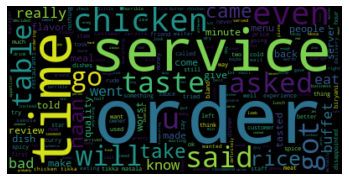

In [448]:
# here is the NEGATIVE wordcloud - made from text from negative reviews only. 

neg = " ".join(review for review in negsenti.text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

# You'll see the most common words used are time, service, order, table

In [472]:
# here I am just simply calculating the top 50 most frequent words occurring in the NEGATIVE reviews. 

negt = Counter("".join(neg).split()).most_common(50)
rslt = pd.DataFrame(negt, columns=['Word', 'Frequency'])
print(rslt)



          Word  Frequency
0          the      26561
1          and      20180
2           to      15962
3            I      15732
4          was      14754
5            a      11748
6           of       8914
7          for       7373
8           it       6713
9           in       6488
10          is       6286
11         The       6022
12        food       5965
13         not       5901
14        that       5133
15          we       4911
16         but       4710
17        they       4703
18        this       4625
19        with       4268
20        were       4161
21          my       4120
22         had       3935
23          on       3612
24        have       3559
25          at       3391
26          be       3013
27          We       2747
28         you       2702
29      Indian       2608
30          so       2474
31        like       2400
32          as       2397
33     chicken       2273
34     ordered       2247
35         are       2242
36       place       2207
37       ord

In [482]:
# Showing a graph of the distribution of the positive and negative reviews for this 
# Indian restaurants dataset. We have most than 25k positive, and about 7k negative.

import plotly
import plotly.express as px

indresto2['sentiment'] = indresto2['sentiment'].replace({-1 : 'Negative'})
indresto2['sentiment'] = indresto2['sentiment'].replace({1 : 'Positive'})

fig = px.histogram(indresto2, x="sentiment")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

---
## Here I'll begin data cleaning and building the model for sentiment analysis.

In [291]:
# Data Cleaning
# First, I will remove all punctuation from the data.


def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final

indresto2['text'] = indresto2['text'].apply(remove_punctuation)

In [294]:
# an example of the first text review. 
indresto2['text'][1174]

"They need alot of work to be in the lead Maybe they are surviving on home delivery option as they donor have occupied seats all the time No lunch hour rush or dinner delights Specials are on some days \nGobhi manchurian is the only yummy dish on menu Dosa is not as good as Mayuri's   Didnt get to eat all food on menu so cant suggest much"

In [451]:
# creating a new Indian restaurants dataframe just so I don't change anything to the original dataset. 
newIRdf = indresto2[["text", "sentiment"]]
newIRdf['ratings'] = indresto2['reviews_stars']
newIRdf.head()

,text,sentiment,ratings
1174,They need alot of work to be in the lead Maybe...,-1,2.0
1176,New South Indian restaurant and only the secon...,1,5.0
1177,We really liked this place We tried the fish f...,1,5.0
1178,Being a keralite I was expecting a lot from h...,-1,1.0
1179,KERALA KITCHEN (45/5)\n\nFirst let me give you...,1,5.0


In [352]:
# random splitting the train and test data

index = newIRdf.index
newIRdf['random_number'] = np.random.randn(len(index))

train = newIRdf[newIRdf['random_number'] <= 0.8]
test = newIRdf[newIRdf['random_number'] > 0.8]

In [353]:
# creating a bag of words model here. 
# this will count the # of occurrences of each word
# count vectorizer:

vectorizer = CountVectorizer(token_pattern = r'\b\w+\b')

train_matrix = vectorizer.fit_transform(train['text'])
test_matrix = vectorizer.transform(test['text'])

In [354]:
# Importing Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [408]:
# Splitting target and independent variables

x_train = train_matrix
x_test = test_matrix
y_train = train['ratings']
y_test = test['ratings']



"\nx_train = train_matrix\nx_test = test_matrix\ny_train = train['sentiment']\ny_test = test['sentiment']\n"

In [414]:
# Fiting the model on the data

lr.fit(x_train,y_train)

LogisticRegression()

In [453]:
# Make predictions

predictions = lr.predict(x_test)

In [454]:
predictions


array([4., 5., 5., ..., 1., 4., 5.])

In [455]:
predictions.shape

(6789,)

In [456]:
# finding the accuracy, precision, recall of the model:

from sklearn.metrics import confusion_matrix,classification_report

new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 720,  203,   25,   32],
       [ 127,  220,   49,   20],
       [  24,   78,  591,  351],
       [  36,   39,  718, 3556]], dtype=int64)

In [457]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         1.0       0.79      0.73      0.76       980
         2.0       0.41      0.53      0.46       416
         4.0       0.43      0.57      0.49      1044
         5.0       0.90      0.82      0.86      4349

    accuracy                           0.75      6789
   macro avg       0.63      0.66      0.64      6789
weighted avg       0.78      0.75      0.76      6789



In [ ]:
# overall accuracy is 78%. 
# not as high as I'd like, but it is close to 80%. 

____


******************
